This notebook contains examples on how to use the Model-Tuner module. Including both regression and classification examples.

In [5]:
from eagles.Supervised import supervised_tuner as st
from eagles.data_sets import data_loader as dl

## Classification Model Evaluation

Example using the classificaiton_model_tuner.model_eval function to evaluate the performance of a logistic regression on the iris dataset. 

Load in the iris.csv file from the Model_Tuner data sets and add a dummy column to be the outcome that will be predicted by the logistic regression.

In [10]:
iris = dl.load_iris()

iris['dummy'] = iris['species'].apply(lambda x: 1 if x =='setosa' else 0)
fts = [ft for ft in iris.columns if ft != 'species' and ft != 'dummy']

print(iris.shape)

(150, 6)


Call the model_eval function passing in 'lr' to tell the funciton to initialiaze a logistic regression with params solver = liblinear. Note the confusion matrix that is output provides row wise percent classified in cell and not raw counts. Also as no path was provided the module will look for and create a directory called data within the Model_Tuner folders.

Random Seed Value: 4
Performing CV Runs: 5
Finished cv run: 1 time: 0.006981372833251953 
 

Finished cv run: 2 time: 0.004987001419067383 
 

Finished cv run: 3 time: 0.00498652458190918 
 

Finished cv run: 4 time: 0.005014181137084961 
 

Finished cv run: 5 time: 0.0050127506256103516 
 

CV Run Scores
accuracy scores: [1. 1. 1. 1. 1.]
accuracy mean: 1.0
accuracy standard deviation: 0.0 

f1 scores: [1. 1. 1. 1. 1.]
f1 mean: 1.0
f1 standard deviation: 0.0 

precision_recall_auc scores: [1. 1. 1. 1. 1.]
precision_recall_auc mean: 1.0
precision_recall_auc standard deviation: 9.930136612989092e-17 

 

Final cv train test split
accuracy score: 1.0
f1 score: 1.0
precision_recall_auc score: 1.0
 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00         9

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00

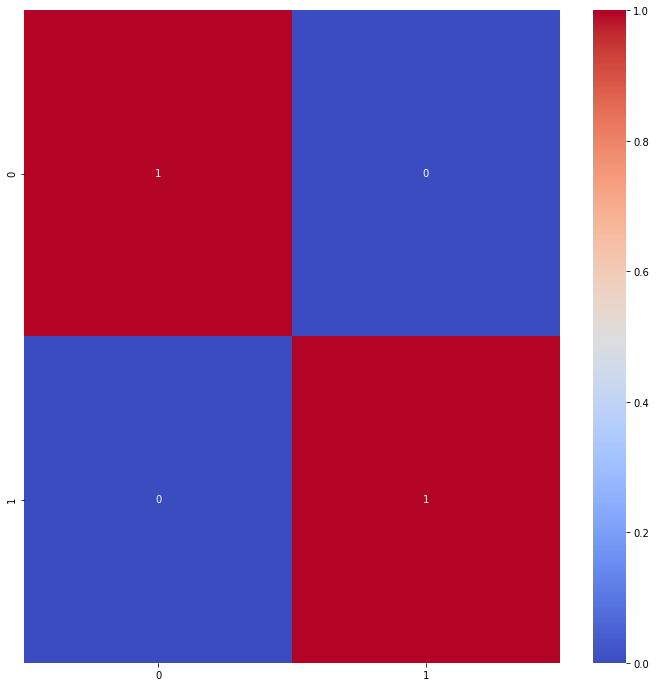

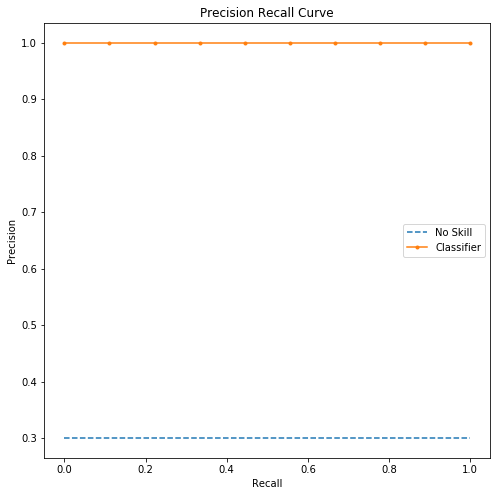

File path for data log: C:\Users\JonLa\Dropbox\Data Science Resources\Model-Tuner\Model_Tuner\data\model_eval_test.txt


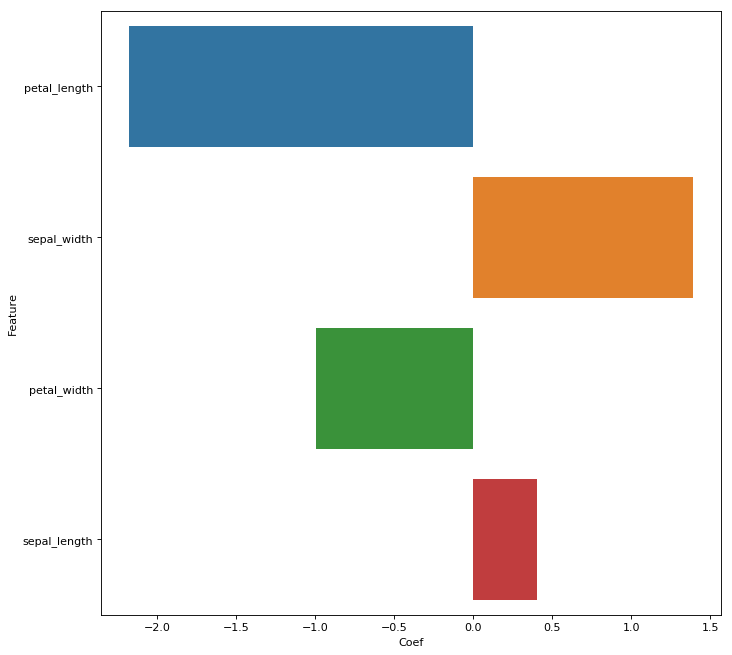

In [9]:
st.model_eval(
    X=iris[fts],
    y=iris['dummy'],
    model='lr',
    params={'solver':'liblinear'},
    metrics=["accuracy", "f1", "precision_recall_auc"],
    bins=None,
    pipe=None,
    scale=None,
    num_top_fts=None,
    num_cv=5,
    get_ft_imp=True,
    random_seed=4,
    binary=True,
    log=True,
    log_name="model_eval_test.txt",
    log_path=None,
    log_note="This is a test of the model eval function"
)

## Classification Model Parameter Tuning

Random Seed Value: 192
Selecting features
Init number of features: 4 

Features dropping due to high correlation: ['petal_width'] 

Features dropping from l1 regression: ['sepal_length'] 

Final number of fts : 2
 

Final features: ['sepal_width', 'petal_length']
 

Dropped features: ['petal_width', 'sepal_length']
 

Fitting 5 folds for each of 4 candidates, totalling 20 fits


c:\users\jonla\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    1.3s finished


Parameters of the best model: 

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l1', 'random_state': 192, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


Performing model eval on best estimator
Random Seed Value: 192
Performing CV Runs: 5
Finished cv run: 1 time: 0.004985332489013672 
 

Finished cv run: 2 time: 0.003989696502685547 
 

Finished cv run: 3 time: 0.003990888595581055 
 

Finished cv run: 4 time: 0.0049860477447509766 
 

Finished cv run: 5 time: 0.003989458084106445 
 

CV Run Scores
accuracy scores: [1. 1. 1. 1. 1.]
accuracy mean: 1.0
accuracy standard deviation: 0.0 

f1 scores: [1. 1. 1. 1. 1.]
f1 mean: 1.0
f1 standard deviation: 0.0 

precision_recall_auc scores: [1. 1. 1. 1. 1.]
precision_recall_auc mean: 1.0
precision_recall_auc standard deviation: 0.0 

 

Final cv train test split
accuracy score: 1.0
f1 score: 1.0
precision

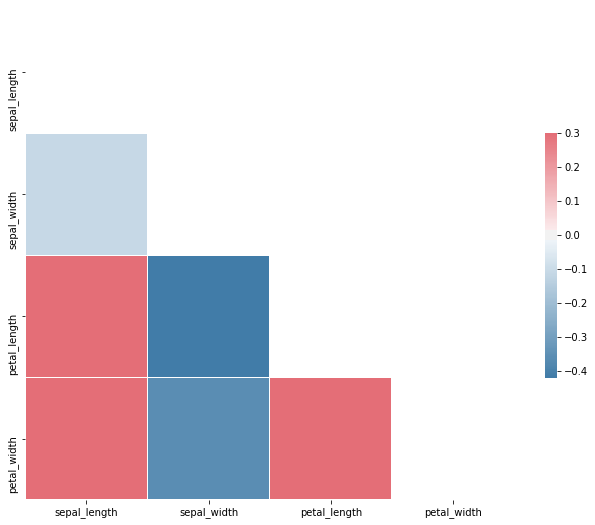

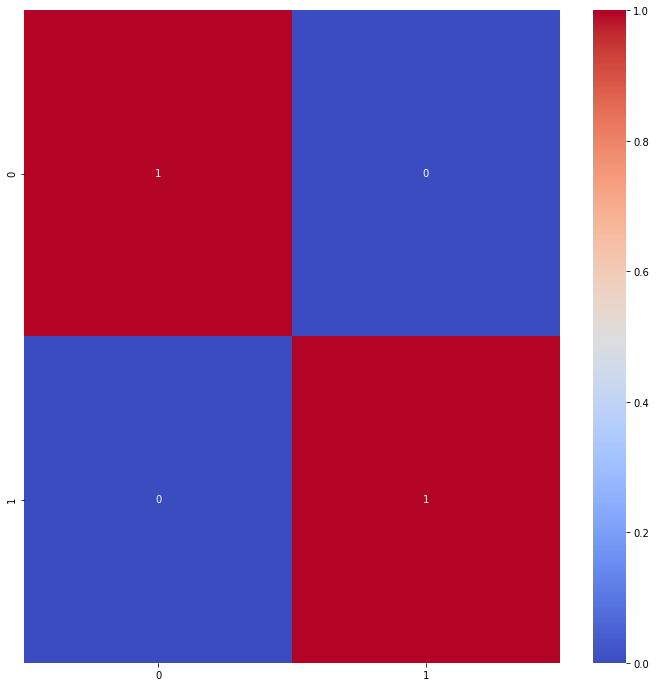

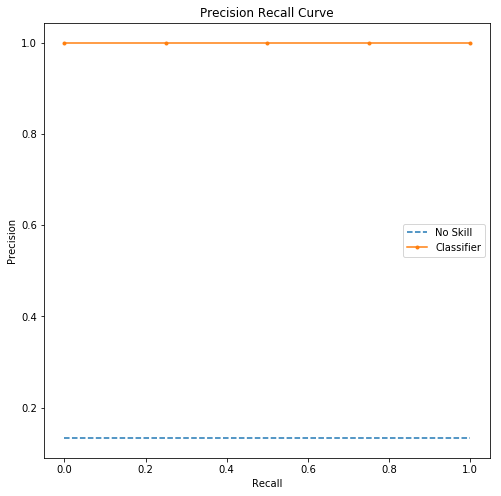

File path for data log: C:\Users\JonLa\Dropbox\Data Science Resources\Model_Tuner\data\model_tunetest_test.txt


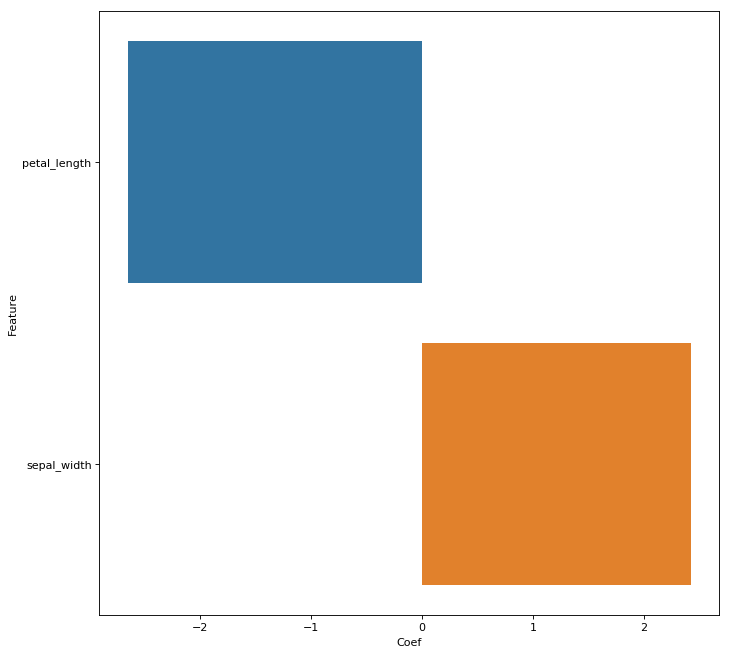

In [5]:
select_features_dict = {
    'methods':['correlation', 'regress'],
    'imp_thresh':.005,
    'corr_thresh':.9,
    'bin_fts':[],
    'dont_drop':None,
    'model_pipe':None,
    'plot_ft_importance':True,
    'plot_ft_corr':True

}

pars = {'solver': ['liblinear']
       , 'penalty':['l1','l2']
       , 'max_iter':[100, 300]
       }

mod, params, features = st.tune_test_model(X=iris[fts],
                                            y=iris['dummy'],
                                            model='lr',
                                            params=pars,
                                            tune_metric="f1",
                                            eval_metrics=["accuracy", "f1", "precision_recall_auc"],
                                            num_cv=5,
                                            pipe=None,
                                            scale=None,
                                            select_features=select_features_dict,
                                            bins=None,
                                            num_top_fts=None,
                                            tuner="grid_cv",
                                            n_iterations=15,
                                            get_ft_imp=True,
                                            n_jobs=2,
                                            random_seed=None,
                                            binary=True,
                                            log=True,
                                            log_name="""model_tunetest_test.txt""",
                                            log_path=None,
                                            log_note="This is a test of the tune test function"
                                        )

Random Seed Value: 323
Selecting features
Init number of features: 4 

Features dropping due to high correlation: ['petal_width'] 

Features dropping from l1 regression: ['sepal_length'] 

Final number of fts : 2
 

Final features: ['sepal_width', 'petal_length']
 

Dropped features: ['petal_width', 'sepal_length']
 

Fitting 5 folds for each of 12 candidates, totalling 60 fits


c:\users\jonla\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    5.4s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:    9.4s finished


Parameters of the best model: 

{'estimators': [('rf', Pipeline(memory=None,
     steps=[('impute', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)), ('clf', RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, m...mators=100, n_jobs=None, oob_score=False, random_state=4,
            verbose=0, warm_start=False))])), ('lr', Pipeline(memory=None,
     steps=[('impute', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)), ('scale', MinMaxScaler(copy=True, feature_range=(0, 1))), ('clf', LogisticRegression(C=0.25, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=4,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))]))], 'flatten_tra

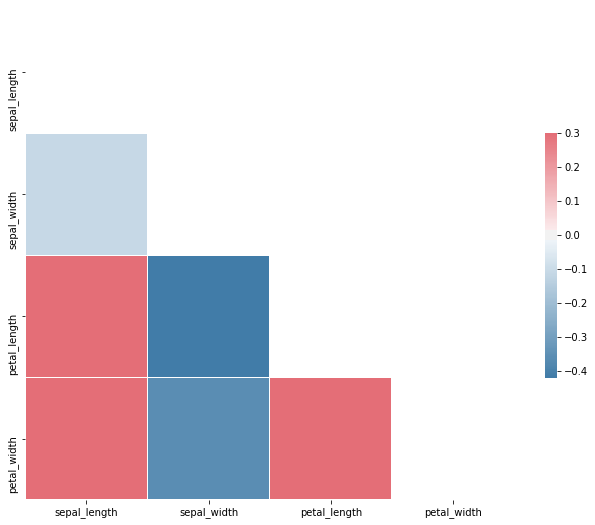

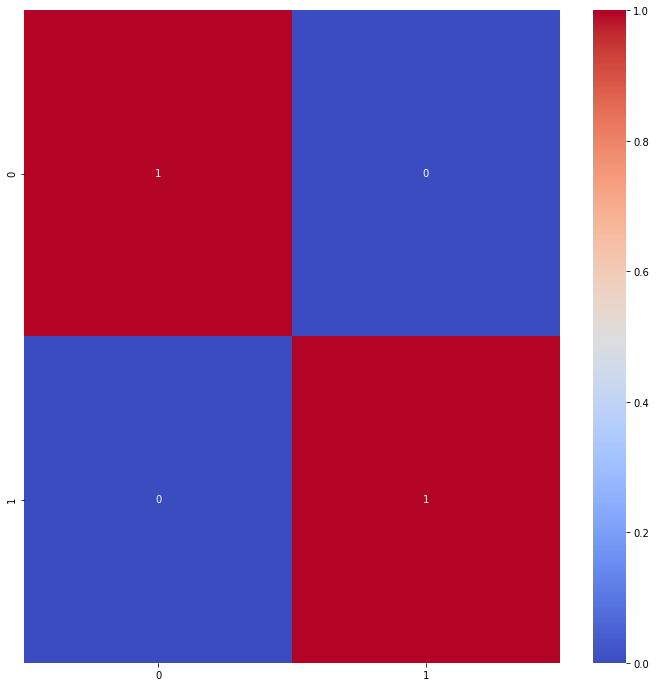

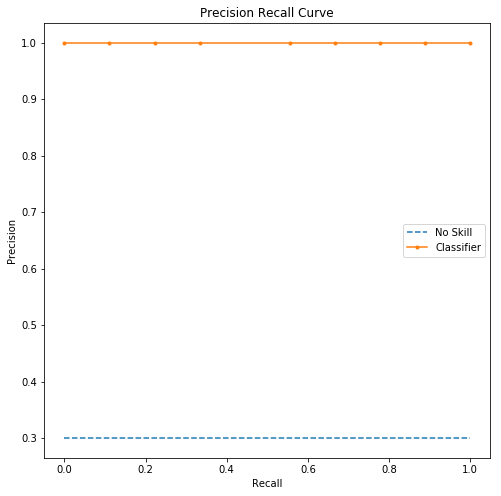

File path for data log: C:\Users\JonLa\Dropbox\Data Science Resources\Model_Tuner\data\model_tunetest_test.txt


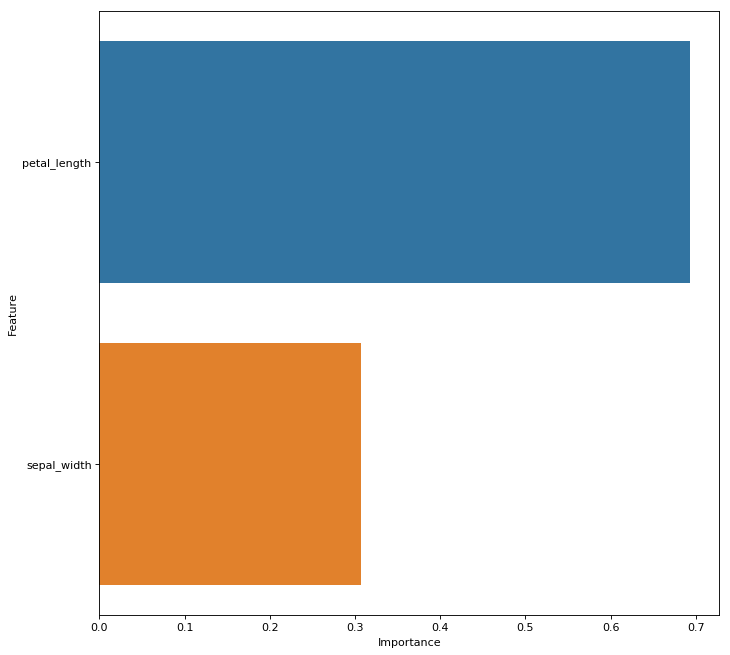

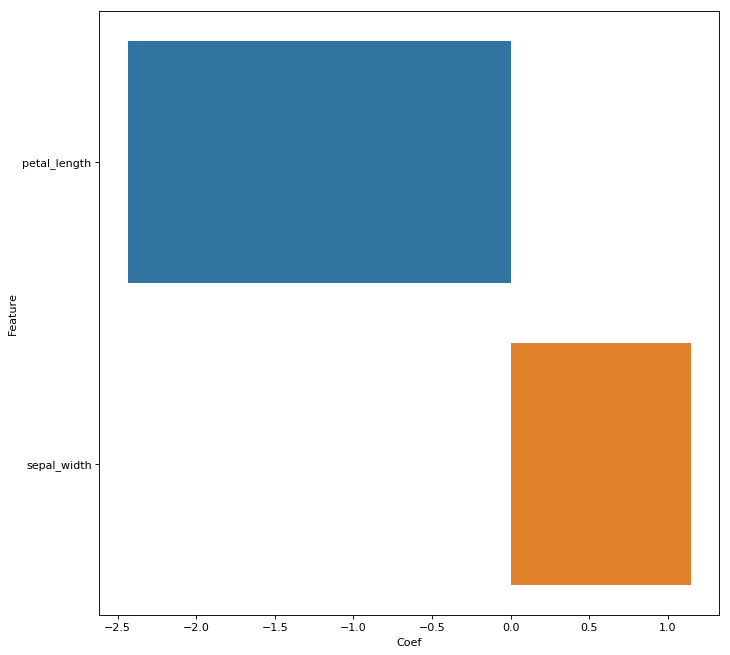

In [3]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

note = """
Voting Classifier with base lr and rf

grid search tuning for f1 for species setsoa

For missing values used median fills with imputer for others. 

Removed the prp cols, loc_pref, cl and vis ideal

regress and corr feature select
"""


# Define the initial steps of the pipeline (i.e. impute and scaling strategy)
select_ft_model_pipe = Pipeline([('impute', SimpleImputer(strategy='median'))
                       ,('scale', MinMaxScaler())]
                     )

# Define the feature selection parameters
select_features_dict = {'methods':['regress', 'correlation']
                       ,'imp_thresh':.005
                       ,'corr_thresh':.9
                       ,'bin_fts':[]
                       ,'dont_drop':None
                       ,'model_pipe':select_ft_model_pipe
                       ,'plot_ft_importance':True
                       ,'plot_ft_corr':True 
                       }


# Define the models  
rf_pipe = Pipeline([('impute', SimpleImputer(strategy='median'))
                    ,('clf', RandomForestClassifier())
                   ])

lr_pipe = Pipeline([('impute', SimpleImputer(strategy='median'))
                    ,('scale', MinMaxScaler())
                    ,('clf', LogisticRegression())
                   ])


vc_clf = VotingClassifier(estimators=[('rf', rf_pipe)
                                      ,('lr', lr_pipe)]
                          , voting='soft')



pars = {'rf__clf__n_estimators':[x for x in range(100,300,50)]
       ,'rf__clf__max_depth':[10]
       ,'rf__clf__class_weight': ['balanced_subsample']
       ,'rf__clf__random_state':[4]
       
       ,'lr__clf__penalty': ['l2']
       ,'lr__clf__class_weight':['balanced']
       ,'lr__clf__max_iter':[1000]
       ,'lr__clf__C': [.25]
       ,'lr__clf__solver':['liblinear']
       ,'lr__clf__random_state':[4] 
       
       ,'weights':[[1,1],[1,2],[2,1]] 
       }


clf, params, clf_fts = st.tune_test_model(X=iris[fts]
                                             , y=iris['dummy']
                                             , model=vc_clf
                                             , params=pars
                                             , tune_metric="f1"
                                            ,eval_metrics=["accuracy", "f1", "precision", "precision_recall_auc"]
                                           , num_cv=5
                                            ,pipe=None
                                            ,scale=None
                                            ,select_features=select_features_dict
                                            ,bins=None
                                            ,num_top_fts=None
                                            ,tuner="grid_cv"
                                            ,n_iterations=15
                                            ,get_ft_imp=True
                                            ,n_jobs=2
                                           ,random_seed=None
                                            ,binary=True
                                            ,log=True
                                            ,log_name="""model_tunetest_test.txt"""
                                            ,log_path=None
                                            ,log_note=note)